# Indicadores de Rentabilidade

* Retorno sobre o Ativo (ROA) $$ROA = \dfrac{Lucro\ Operacional}{Ativo\ Total}$$


* Retorno sobre o PL (ROE) $$ROE = \dfrac{Lucro\ Líquido}{Patrimônio\ Líquido}$$

In [22]:
import os
import re
import unidecode
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import scipy.stats as stats

plt.style.use('seaborn')
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = "14"

In [2]:
def secure_name(string):
    """
    Remove caracteres especiais de uma string
    """
    pattern = r'[^A-Za-z0-9_]+'
    output_string = string.replace(' ', '_').lower()
    output_string = unidecode.unidecode(output_string)
    output_string = re.sub(pattern, '', output_string)
    return output_string

In [3]:
ROOT_DIR = os.getcwd().replace('src', '')

In [4]:
novo_mercado = pd.read_csv(os.path.join(ROOT_DIR, 'data', 'sample_market-2022-09-15.csv'))
novo_mercado.head()

,Nome Do Pregão,Código,Denominação Social,Segmento De Mercado,Tipo De Capital,Capital R$,Aprovado Em,Qtde Ações Ordinárias,Qtde Ações Preferenciais,Qtde Total De Ações,CNPJ,Código CVM,Ticker,Atividade Principal,Setor Econômico,Subsetor Econômico,Segmento Econômico,Site,Url
0,ATMASA,ATMP,ATMA PARTICIPAÇÕES S.A.,NOVO MERCADO,Homologado,1.419403e+09,15/12/2021,26710356,0,26710356,04.032.433/0001-80,19100,ATMP3.SA,A ATMA Participações S.A. tem como objeto soci...,Bens Industriais,Serviços,Serviços Diversos,www.liq.com.br,https://sistemaswebb3-listados.b3.com.br/liste...
1,CCR SA,CCRO,CCR S.A.,NOVO MERCADO,Homologado,6.126100e+09,09/02/2017,2020000000,0,2020000000,02.846.056/0001-97,18821,CCRO3.SA,Prestadora de serviços públicos por meio de co...,Bens Industriais,Transporte,Exploração de Rodovias,www.ccr.com.br,https://sistemaswebb3-listados.b3.com.br/liste...
2,ECORODOVIAS,ECOR,ECORODOVIAS INFRAESTRUTURA E LOGÍSTICA S.A.,NOVO MERCADO,Homologado,2.101489e+09,23/06/2021,696334224,0,696334224,04.149.454/0001-80,19453,ECOR3.SA,Exploração direta ou indireta de negócios de c...,Bens Industriais,Transporte,Exploração de Rodovias,www.ecorodovias.com.br,https://sistemaswebb3-listados.b3.com.br/liste...
3,EMBRAER,EMBR,EMBRAER S.A.,NOVO MERCADO,Homologado,5.159617e+09,05/03/2018,740465044,0,740465044,07.689.002/0001-89,20087,EMBR3.SA,Projeto. desenvolvimento. fabricação. comercia...,Bens Industriais,Material de Transporte,Material Aeronáutico e de Defesa,www.embraer.com.br,https://sistemaswebb3-listados.b3.com.br/liste...
4,ETERNIT,ETER,ETERNIT S.A.,NOVO MERCADO,Homologado,4.380815e+08,29/09/2021,61776575,0,61776575,61.092.037/0001-81,5762,ETER3.SA,Industrialização e comercialização de produtos...,Bens Industriais,Construção e Engenharia,Produtos para Construção,www.eternit.com.br/ri,https://sistemaswebb3-listados.b3.com.br/liste...


In [5]:
setores = novo_mercado['Setor Econômico'].drop_duplicates().to_list()
setores

['Bens Industriais',
 'Comunicações',
 'Consumo Cíclico',
 'Consumo não Cíclico',
 'Financeiro',
 'Materiais Básicos',
 'Petróleo. Gás e Biocombustíveis',
 'Saúde',
 'Tecnologia da Informação',
 'Utilidade Pública']

In [6]:
dfcs_nomes = ['BPA_con', 'BPP_con', 'DRE_con']
dfcs = pd.DataFrame()
for nome in dfcs_nomes:
    for tipo in ['itr', 'dfp']:
        tmp = pd.read_csv(os.path.join(ROOT_DIR, 'data', 'dfcs', f'{tipo}_cia_aberta_{nome}_2017-2021.csv'))
        dfcs = pd.concat([dfcs, tmp])
    
dfcs = dfcs[dfcs['ORDEM_EXERC']=='ÚLTIMO']
dfcs = dfcs[['DT_REFER', 'DENOM_CIA', 'CNPJ_CIA', 'CD_CVM', 'CD_CONTA', 'DS_CONTA', 'VL_CONTA']]
dfcs['DT_REFER'] = pd.to_datetime(dfcs['DT_REFER'])
dfcs = dfcs[dfcs['CD_CONTA'].apply(lambda x: len(x) <= 10)]
dfcs.reset_index(drop=True, inplace=True)
dfcs = dfcs.sort_values(['DENOM_CIA', 'DT_REFER'])
dfcs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1204819 entries, 251943 to 1195523
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   DT_REFER   1204819 non-null  datetime64[ns]
 1   DENOM_CIA  1204819 non-null  object        
 2   CNPJ_CIA   1204819 non-null  object        
 3   CD_CVM     1204819 non-null  int64         
 4   CD_CONTA   1204819 non-null  object        
 5   DS_CONTA   1204819 non-null  object        
 6   VL_CONTA   1204819 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 73.5+ MB


In [7]:
dfcs.head()

,DT_REFER,DENOM_CIA,CNPJ_CIA,CD_CVM,CD_CONTA,DS_CONTA,VL_CONTA
251943,2019-12-31,2W ENERGIA S.A.,08.773.135/0001-00,25224,1,Ativo Total,424330.0
251944,2019-12-31,2W ENERGIA S.A.,08.773.135/0001-00,25224,1.01,Ativo Circulante,286849.0
251945,2019-12-31,2W ENERGIA S.A.,08.773.135/0001-00,25224,1.01.01,Caixa e Equivalentes de Caixa,11588.0
251946,2019-12-31,2W ENERGIA S.A.,08.773.135/0001-00,25224,1.01.02,Aplicações Financeiras,0.0
251947,2019-12-31,2W ENERGIA S.A.,08.773.135/0001-00,25224,1.01.02.01,Aplicações Financeiras Avaliadas a Valor Justo...,0.0


In [8]:
contas = dfcs[dfcs['CD_CVM']==25224]
contas = contas[['CD_CONTA', 'DS_CONTA']].drop_duplicates()

In [11]:
display(contas[:51])
display(contas[51:100])
display(contas[100:])

,CD_CONTA,DS_CONTA
251943,1,Ativo Total
251944,1.01,Ativo Circulante
251945,1.01.01,Caixa e Equivalentes de Caixa
251946,1.01.02,Aplicações Financeiras
251947,1.01.02.01,Aplicações Financeiras Avaliadas a Valor Justo...
251948,1.01.02.02,Aplicações Financeiras Avaliadas a Valor Justo...
251949,1.01.02.03,Aplicações Financeiras Avaliadas ao Custo Amor...
251950,1.01.03,Contas a Receber
251951,1.01.03.01,Clientes
251952,1.01.03.02,Outras Contas a Receber


,CD_CONTA,DS_CONTA
737805,2.01.03.02,Obrigações Fiscais Estaduais
737806,2.01.03.03,Obrigações Fiscais Municipais
737807,2.01.04,Empréstimos e Financiamentos
737808,2.01.04.01,Empréstimos e Financiamentos
737809,2.01.04.02,Debêntures
737810,2.01.04.03,Financiamento por Arrendamento
737811,2.01.05,Outras Obrigações
737812,2.01.05.01,Passivos com Partes Relacionadas
737813,2.01.05.02,Outros
737814,2.01.06,Provisões


,CD_CONTA,DS_CONTA
737854,2.03.04.02,Reserva Estatutária
737855,2.03.04.03,Reserva para Contingências
737856,2.03.04.04,Reserva de Lucros a Realizar
737857,2.03.04.05,Reserva de Retenção de Lucros
737858,2.03.04.06,Reserva Especial para Dividendos Não Distribuídos
737859,2.03.04.07,Reserva de Incentivos Fiscais
737860,2.03.04.08,Dividendo Adicional Proposto
737861,2.03.04.09,Ações em Tesouraria
737862,2.03.05,Lucros/Prejuízos Acumulados
737863,2.03.06,Ajustes de Avaliação Patrimonial


In [62]:
def calcula_vl_conta_medio(df, cd_conta):
    x = df[df['CD_CONTA']==cd_conta]
    x = x.sort_values(['CD_CONTA', 'DT_REFER'])
    x.set_index('DT_REFER', inplace=True)

    tmp = pd.DataFrame(index=x.index, columns=x.columns)
    tmp['CD_CONTA'] = [f'{cd_conta} Médio' for _ in tmp['CD_CONTA']]
    tmp['VL_CONTA'] = list((x['VL_CONTA'] + x['VL_CONTA'].shift(1))/2)
    tmp = tmp.reset_index().sort_values(['DT_REFER'])
    tmp = pd.concat([df, tmp]).reset_index(drop=True)
    return tmp

In [63]:
def calcula_rentabilidade(x):
    x = calcula_vl_conta_medio(x, cd_conta='1')
    x = calcula_vl_conta_medio(x, cd_conta='2.03')
    ATM = x[x['CD_CONTA']=='1 Médio'].iloc[0]['VL_CONTA'] # Ativo Total Médio
    PLM = x[x['CD_CONTA']=='2.03 Médio'].iloc[0]['VL_CONTA'] # Patrimônio Líquido Médio
    LO = x[x['CD_CONTA']=='3.07'].iloc[0]['VL_CONTA'] # Lucro Operacional
    LL = x[x['CD_CONTA']=='3.11'].iloc[0]['VL_CONTA'] # Lucro Líquido
    

    
    ROA = LO / ATM
    ROE = LL / PLM
    
    return pd.Series([ROA, ROE], index=['ROA', 'ROE'])

In [88]:
def calcula_rentabilidade_setorial(dfcs, setor, nome=None):
    rentabilidade_empresas = {}

    for cd_cvm in setor['Código CVM'].to_list():
        try:
            empresa = dfcs[dfcs['CD_CVM']==cd_cvm].reset_index(drop=True)
            if nome=='Comunicações':#17639 -> Tim participações
                empresa = dfcs[dfcs['CD_CVM'].isin([cd_cvm, 17639])].reset_index(drop=True)
            empresa = empresa[empresa['CD_CONTA'].apply(lambda x: len(x) <= 10)]
            empresa = calcula_vl_conta_medio(empresa, '1')
            empresa = calcula_vl_conta_medio(empresa, '2.03')
            rentabilidade = empresa.groupby('DT_REFER').apply(calcula_rentabilidade)
            rentabilidade.index = pd.PeriodIndex(rentabilidade.index, freq='Q')
            rentabilidade_empresas[cd_cvm] = rentabilidade
        except:
            rentabilidade_empresas[cd_cvm] = pd.DataFrame()

    rentabilidade_setorial = pd.DataFrame()
    for cd_cvm, rentabilidade in rentabilidade_empresas.items():
        peso = setor[setor['Código CVM']==cd_cvm]['Peso Capital Social'].reset_index(drop=True)
        peso = peso[0]
        rentabilidade_setorial = rentabilidade_setorial.add(peso * rentabilidade, fill_value=0)
        
    rentabilidade_setorial.to_csv(os.path.join(ROOT_DIR, 'data', 'indicadores', f'rentabilidade_{secure_name(nome)}.csv'))

    return rentabilidade_setorial


In [91]:
def plot_rentabilidade(rentabilidade_setorial, nome=None):
    rentabilidade_setorial = rentabilidade_setorial['2018-01-01':]
    tidy = pd.melt(rentabilidade_setorial.reset_index(), id_vars='DT_REFER', value_vars=['ROA', 'ROE'])
    tidy.columns=['Trimestre', 'Rentabilidade', 'Valor']

    fig, ax = plt.subplots(figsize=(20, 6))
    sns.barplot(data=tidy, x='Trimestre', y='Valor', hue='Rentabilidade', ax=ax)
    #ax.set_ylim([int(endividamento_setorial.min().min()) - 1, 1.5 + int(endividamento_setorial.max().max())])

    ax.set_ylabel('Rentabilidade', fontweight='bold')
    ax.set_xlabel('Trimestre', fontweight='bold')
    
    plt.savefig(os.path.join(ROOT_DIR, 'img', 'indicadores', f'rentabilidade_{secure_name(nome)}.png'), bbox_inches='tight')

    plt.show()

In [99]:
def calcula_rentabilidade_testes(rentabilidade_setorial, nome=None):
    rentabilidade_setorial = rentabilidade_setorial['2018-01-01':]
    rentabilidade_prepandemia = rentabilidade_setorial[:'2019-12-31']
    rentabilidade_pandemia = rentabilidade_setorial['2020-01-01':]

    rentabilidade_prepandemia_stats = rentabilidade_prepandemia.describe().drop(['count'], axis=0)
    print('Estatísticas Descritivas - Pré-pandemia')
    display(rentabilidade_prepandemia_stats)
    rentabilidade_prepandemia_stats.to_csv(os.path.join(ROOT_DIR, 'data', 'indicadores', f'rentabilidade_{secure_name(nome)}_prepandemia_stats.csv'))
    
    
    rentabilidade_pandemia_stats = rentabilidade_pandemia.describe().drop(['count'], axis=0)
    rentabilidade_pandemia_stats.to_csv(os.path.join(ROOT_DIR, 'data', 'indicadores', f'rentabilidade_{secure_name(nome)}_pandemia_stats.csv'))
    print('Estatísticas Descritivas - Pandemia')
    display(rentabilidade_pandemia_stats)
    
    
    cols = ['Rentabilidade', 'Teste', 'Estatística', 'Valor p']
    rentabilidade_stats = pd.DataFrame(columns=cols)
    for rent in rentabilidade_setorial.columns:

        group1, group2 = rentabilidade_prepandemia[rent].to_numpy(), rentabilidade_pandemia[rent].to_numpy()
        ttest= stats.ttest_ind(a=group1, b=group2)
        htest = stats.kruskal(group1, group2)

        dft = pd.DataFrame([rent, 'Teste t', ttest.statistic, ttest.pvalue]).T
        dfh = pd.DataFrame([rent, 'Teste H', htest.statistic, htest.pvalue]).T

        dft.columns = cols
        dfh.columns = cols

        rentabilidade_stats = pd.concat([rentabilidade_stats, dft, dfh])

    rentabilidade_stats.reset_index(drop=True, inplace=True)
    rentabilidade_stats.to_csv(os.path.join(ROOT_DIR, 'data', 'indicadores', f'rentabilidade_{secure_name(nome)}_testes.csv'), index=False)
    
    return rentabilidade_stats

In [100]:
def lista_setores():
    setores_dict = {}
    for setor_nome in novo_mercado['Setor Econômico'].drop_duplicates().to_list():
        setor_df = novo_mercado[novo_mercado['Setor Econômico']==setor_nome]\
            .sort_values(by=['Capital R$'], ascending=False)\
            .reset_index(drop=True)
        setor_df['Peso Capital Social'] = setor_df['Capital R$'] / setor_df['Capital R$'].sum()
        
        setores_dict[setor_nome] = setor_df[['Denominação Social', 'Código CVM', 'Ticker', 'Capital R$', 'Peso Capital Social']]
        
    return setores_dict

## Análise dos setores


 BENS INDUSTRIAIS
1) Rentabilidade Setorial


,ROA,ROE
DT_REFER,,
2018Q1,0.008347,0.031011
2018Q2,0.012505,-0.024765
2018Q3,0.024273,-0.015854
2018Q4,0.028072,-0.041953
2019Q1,0.007800,0.531477
2019Q2,0.014883,-0.028448
2019Q3,0.025165,-0.244113
2019Q4,0.031109,0.207342
2020Q1,-0.000524,0.032426


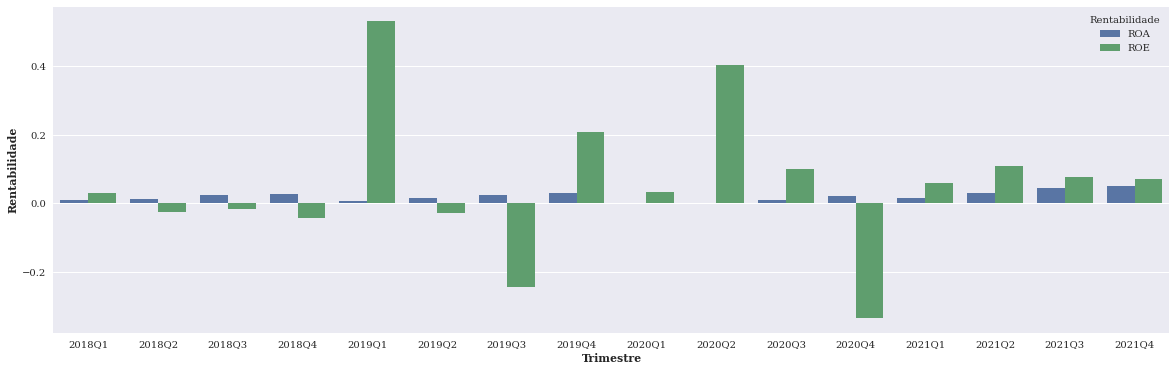

2) Testes de Hipótese
Estatísticas Descritivas - Pré-pandemia


,ROA,ROE
mean,0.019019,0.051837
std,0.009203,0.229269
min,0.007800,-0.244113
25%,0.011465,-0.031824
50%,0.019578,-0.020310
75%,0.025892,0.075094
max,0.031109,0.531477


Estatísticas Descritivas - Pandemia


,ROA,ROE
mean,0.020881,0.064312
std,0.019071,0.199611
min,-0.000524,-0.335688
25%,0.006406,0.053151
50%,0.016976,0.073486
75%,0.034218,0.102044
max,0.049343,0.402717


,Rentabilidade,Teste,Estatística,Valor p
0,ROA,Teste t,-0.248697,0.807207
1,ROA,Teste H,0.0,1.0
2,ROE,Teste t,-0.116074,0.909242
3,ROE,Teste H,1.334559,0.247996



 COMUNICAÇÕES
1) Rentabilidade Setorial


,ROA,ROE
DT_REFER,,
2018Q1,0.010792,0.013436
2018Q2,0.021607,0.031518
2018Q3,0.036573,0.100705
2018Q4,0.059939,0.129391
2019Q1,0.005412,0.006045
2019Q2,0.083235,0.102350
2019Q3,0.091095,0.123737
2019Q4,0.114461,0.163918
2020Q1,0.006526,0.007190


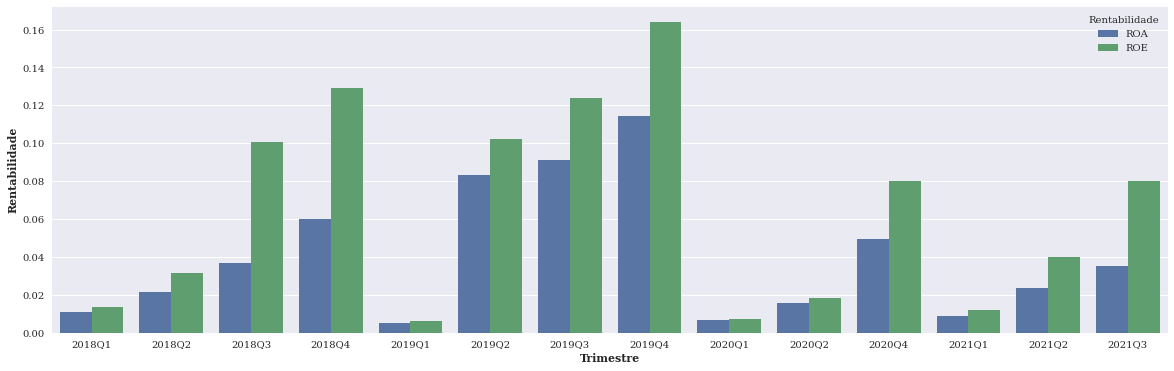

2) Testes de Hipótese
Estatísticas Descritivas - Pré-pandemia


,ROA,ROE
mean,0.052889,0.083887
std,0.040519,0.059103
min,0.005412,0.006045
25%,0.018903,0.026997
50%,0.048256,0.101527
75%,0.085200,0.125150
max,0.114461,0.163918


Estatísticas Descritivas - Pandemia


,ROA,ROE
mean,0.023125,0.039692
std,0.016494,0.033322
min,0.006526,0.007190
25%,0.010566,0.013549
50%,0.019521,0.029383
75%,0.032123,0.070126
max,0.049276,0.080216


,Rentabilidade,Teste,Estatística,Valor p
0,ROA,Teste t,1.684015,0.117989
1,ROA,Teste H,1.666667,0.196706
2,ROE,Teste t,1.636567,0.12766
3,ROE,Teste H,2.016667,0.15558



 CONSUMO CÍCLICO
1) Rentabilidade Setorial


,ROA,ROE
DT_REFER,,
2018Q1,0.004843,0.016681
2018Q2,0.008147,0.025013
2018Q3,0.009961,-0.114032
2018Q4,0.019345,0.257836
2019Q1,0.001279,0.019503
2019Q2,0.002475,-0.025915
2019Q3,0.000781,0.135768
2019Q4,-0.001372,0.072090
2020Q1,-0.009315,-0.044638


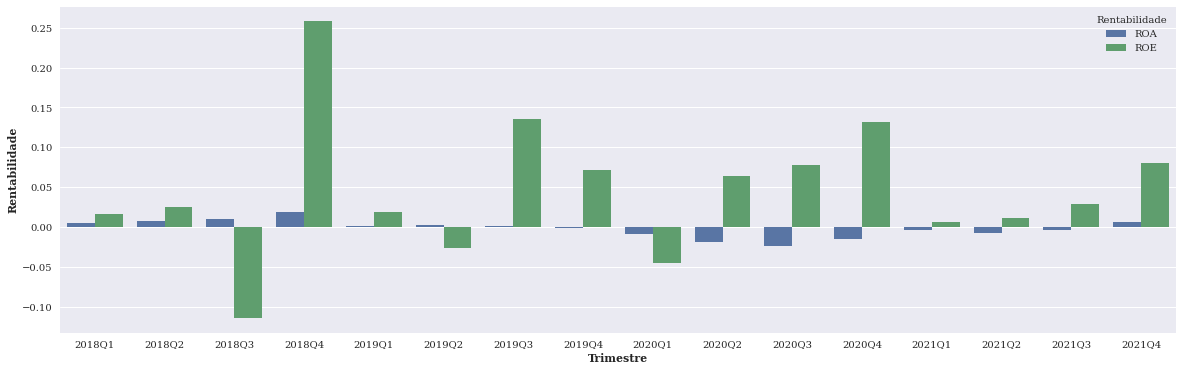

2) Testes de Hipótese
Estatísticas Descritivas - Pré-pandemia


,ROA,ROE
mean,0.005682,0.048368
std,0.006711,0.111068
min,-0.001372,-0.114032
25%,0.001154,0.006032
50%,0.003659,0.022258
75%,0.008601,0.088010
max,0.019345,0.257836


Estatísticas Descritivas - Pandemia


,ROA,ROE
mean,-0.009412,0.044501
std,0.009801,0.055021
min,-0.023801,-0.044638
25%,-0.016340,0.010372
50%,-0.008229,0.046182
75%,-0.003657,0.078760
max,0.006726,0.131808


,Rentabilidade,Teste,Estatística,Valor p
0,ROA,Teste t,3.594391,0.002931
1,ROA,Teste H,8.040441,0.004574
2,ROE,Teste t,0.08824,0.930936
3,ROE,Teste H,0.011029,0.916359



 CONSUMO NÃO CÍCLICO
1) Rentabilidade Setorial


,ROA,ROE
DT_REFER,,
2018Q1,0.008661,-0.748439
2018Q2,-0.006242,0.004530
2018Q3,-0.006330,-0.012583
2018Q4,-0.002808,0.059570
2019Q1,0.008552,0.010596
2019Q2,0.018795,0.060390
2019Q3,0.026211,0.092057
2019Q4,0.044879,0.165181
2020Q1,-0.010040,-0.005994


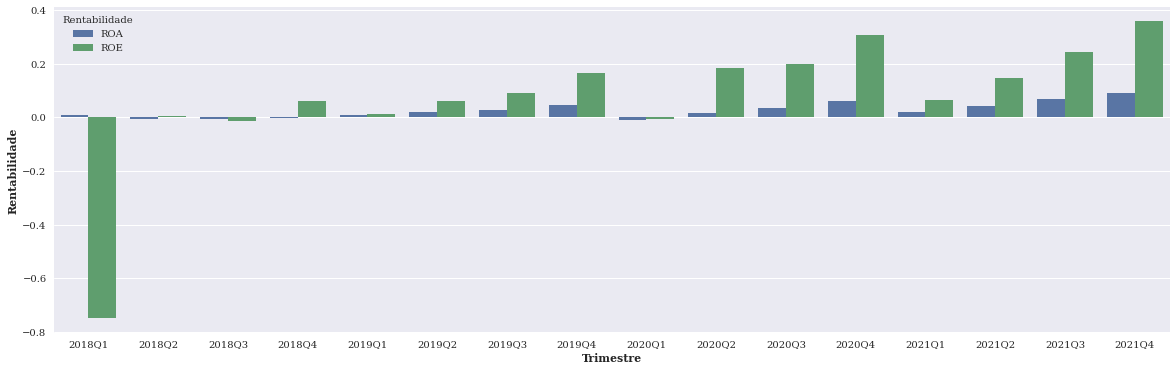

2) Testes de Hipótese
Estatísticas Descritivas - Pré-pandemia


,ROA,ROE
mean,0.011465,-0.046087
std,0.017880,0.289437
min,-0.006330,-0.748439
25%,-0.003666,0.000252
50%,0.008607,0.035083
75%,0.020649,0.068306
max,0.044879,0.165181


Estatísticas Descritivas - Pandemia


,ROA,ROE
mean,0.039791,0.186775
std,0.031656,0.119867
min,-0.010040,-0.005994
25%,0.019195,0.126971
50%,0.038106,0.191211
75%,0.060770,0.258212
max,0.089853,0.357307


,Rentabilidade,Teste,Estatística,Valor p
0,ROA,Teste t,-2.203724,0.044787
1,ROA,Teste H,3.1875,0.074203
2,ROE,Teste t,-2.10241,0.054091
3,ROE,Teste H,5.834559,0.015714



 FINANCEIRO
1) Rentabilidade Setorial


,ROA,ROE
DT_REFER,,
2018Q1,0.018551,0.031837
2018Q2,0.039592,0.068345
2018Q3,0.056270,0.098825
2018Q4,0.083508,0.143714
2019Q1,0.020203,0.032522
2019Q2,0.047194,0.074495
2019Q3,0.088513,0.129579
2019Q4,0.112072,0.188724
2020Q1,0.017760,0.028343


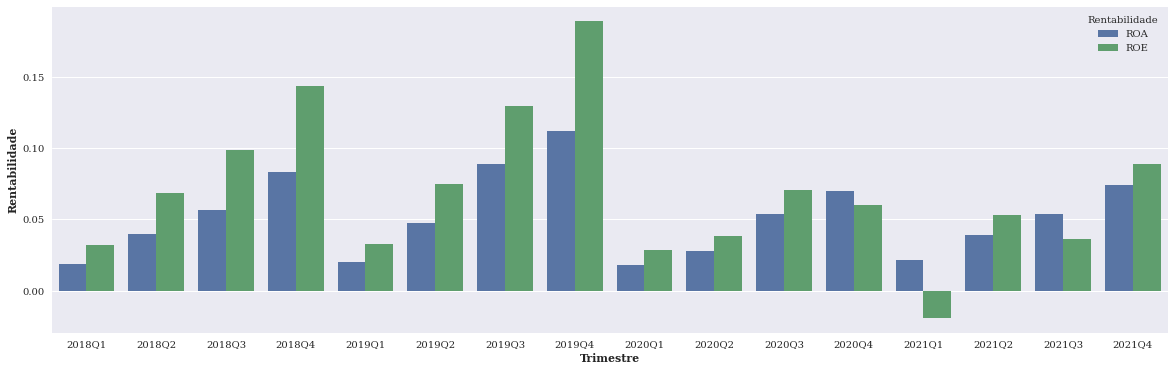

2) Testes de Hipótese
Estatísticas Descritivas - Pré-pandemia


,ROA,ROE
mean,0.058238,0.096005
std,0.033697,0.055270
min,0.018551,0.031837
25%,0.034745,0.059389
50%,0.051732,0.086660
75%,0.084759,0.133113
max,0.112072,0.188724


Estatísticas Descritivas - Pandemia


,ROA,ROE
mean,0.044629,0.044572
std,0.021498,0.032500
min,0.017760,-0.019088
25%,0.026162,0.034323
50%,0.046280,0.045693
75%,0.057620,0.062559
max,0.074229,0.088975


,Rentabilidade,Teste,Estatística,Valor p
0,ROA,Teste t,0.963011,0.351882
1,ROA,Teste H,0.705882,0.400814
2,ROE,Teste t,2.268871,0.039617
3,ROE,Teste H,3.1875,0.074203



 MATERIAIS BÁSICOS
1) Rentabilidade Setorial


,ROA,ROE
DT_REFER,,
2018Q1,0.023467,0.034479
2018Q2,0.007667,0.010458
2018Q3,0.028596,0.034481
2018Q4,0.061041,0.119618
2019Q1,-0.023784,-0.041208
2019Q2,-0.017619,-0.035111
2019Q3,0.001025,-0.018732
2019Q4,-0.027161,-0.059768
2020Q1,-0.029095,-0.152069


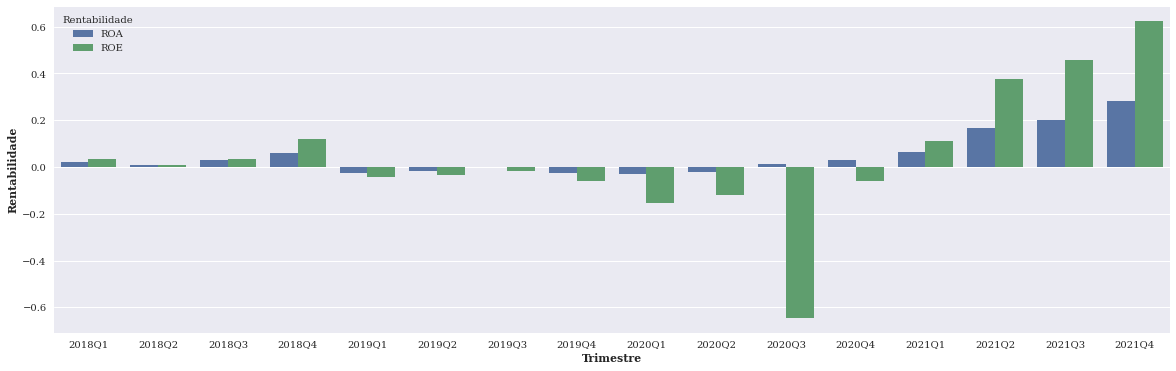

2) Testes de Hipótese
Estatísticas Descritivas - Pré-pandemia


,ROA,ROE
mean,0.006654,0.005527
std,0.030270,0.057824
min,-0.027161,-0.059768
25%,-0.019160,-0.036635
50%,0.004346,-0.004137
75%,0.024749,0.034480
max,0.061041,0.119618


Estatísticas Descritivas - Pandemia


,ROA,ROE
mean,0.087826,0.073335
std,0.114450,0.407647
min,-0.029095,-0.645120
25%,0.003633,-0.128838
50%,0.046312,0.025376
75%,0.175534,0.395133
max,0.281758,0.622284


,Rentabilidade,Teste,Estatística,Valor p
0,ROA,Teste t,-1.93934,0.072883
1,ROA,Teste H,2.161765,0.141482
2,ROE,Teste t,-0.465816,0.648512
3,ROE,Teste H,0.0,1.0



 PETRÓLEO. GÁS E BIOCOMBUSTÍVEIS
1) Rentabilidade Setorial


,ROA,ROE
DT_REFER,,
2018Q1,0.008816,0.004780
2018Q2,0.018984,0.001172
2018Q3,0.038450,0.020766
2018Q4,0.081455,0.094372
2019Q1,0.003996,-0.003745
2019Q2,0.020412,0.025964
2019Q3,0.030191,0.074243
2019Q4,0.067159,0.190374
2020Q1,-0.010416,-0.059964


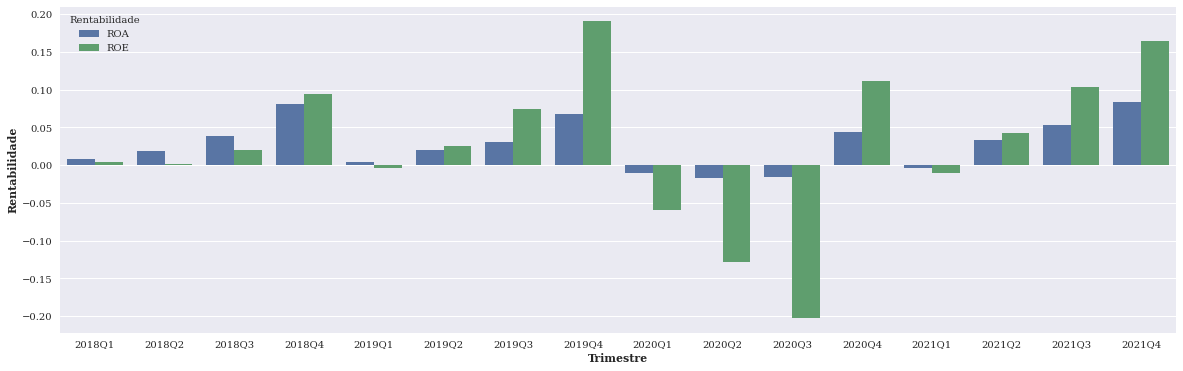

2) Testes de Hipótese
Estatísticas Descritivas - Pré-pandemia


,ROA,ROE
mean,0.033683,0.050991
std,0.027593,0.066551
min,0.003996,-0.003745
25%,0.016442,0.003878
50%,0.025301,0.023365
75%,0.045627,0.079275
max,0.081455,0.190374


Estatísticas Descritivas - Pandemia


,ROA,ROE
mean,0.020787,0.002490
std,0.037768,0.127074
min,-0.017200,-0.202337
25%,-0.011827,-0.077070
50%,0.015025,0.015835
75%,0.045981,0.105075
max,0.083554,0.164922


,Rentabilidade,Teste,Estatística,Valor p
0,ROA,Teste t,0.779831,0.448474
1,ROA,Teste H,0.540441,0.46225
2,ROE,Teste t,0.95632,0.355134
3,ROE,Teste H,0.397059,0.528612



 SAÚDE
1) Rentabilidade Setorial


,ROA,ROE
DT_REFER,,
2018Q1,0.024252,0.030668
2018Q2,0.043831,0.054888
2018Q3,0.063321,0.081645
2018Q4,0.064808,0.095922
2019Q1,0.018525,0.026555
2019Q2,0.032273,0.049024
2019Q3,0.047949,0.078406
2019Q4,0.049139,0.090744
2020Q1,0.001194,0.000868


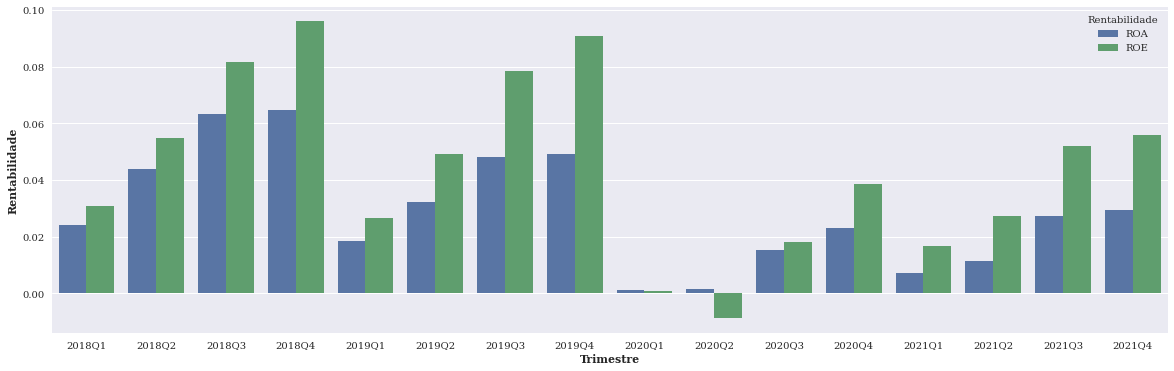

2) Testes de Hipótese
Estatísticas Descritivas - Pré-pandemia


,ROA,ROE
mean,0.043012,0.063481
std,0.016975,0.026916
min,0.018525,0.026555
25%,0.030268,0.044435
50%,0.045890,0.066647
75%,0.052684,0.083920
max,0.064808,0.095922


Estatísticas Descritivas - Pandemia


,ROA,ROE
mean,0.014596,0.025096
std,0.011158,0.023020
min,0.001194,-0.008687
25%,0.005905,0.012793
50%,0.013326,0.022654
75%,0.024161,0.041911
max,0.029501,0.056005


,Rentabilidade,Teste,Estatística,Valor p
0,ROA,Teste t,3.956645,0.001433
1,ROA,Teste H,8.040441,0.004574
2,ROE,Teste t,3.065453,0.008389
3,ROE,Teste H,5.338235,0.020863



 TECNOLOGIA DA INFORMAÇÃO
1) Rentabilidade Setorial


,ROA,ROE
DT_REFER,,
2018Q1,0.008573,-0.035144
2018Q2,0.025840,0.072874
2018Q3,0.040057,0.072760
2018Q4,0.035563,0.088924
2019Q1,0.013710,0.002094
2019Q2,0.025008,0.019793
2019Q3,0.047044,0.060458
2019Q4,0.059062,0.069600
2020Q1,0.015894,0.012920


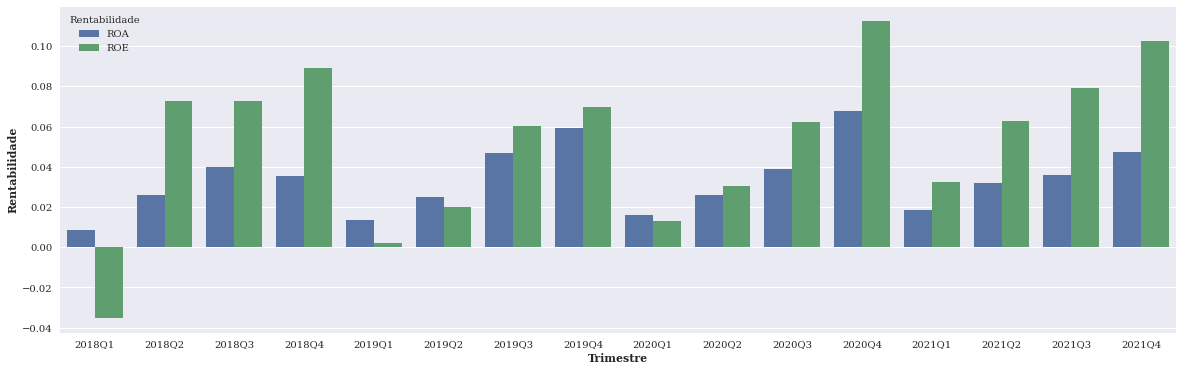

2) Testes de Hipótese
Estatísticas Descritivas - Pré-pandemia


,ROA,ROE
mean,0.031857,0.043920
std,0.016930,0.043443
min,0.008573,-0.035144
25%,0.022184,0.015368
50%,0.030701,0.065029
75%,0.041804,0.072788
max,0.059062,0.088924


Estatísticas Descritivas - Pandemia


,ROA,ROE
mean,0.035235,0.061797
std,0.016708,0.035320
min,0.015894,0.012920
25%,0.024112,0.031812
50%,0.033842,0.062442
75%,0.041082,0.084854
max,0.067502,0.112193


,Rentabilidade,Teste,Estatística,Valor p
0,ROA,Teste t,-0.401667,0.693994
1,ROA,Teste H,0.275735,0.59951
2,ROE,Teste t,-0.90313,0.381734
3,ROE,Teste H,0.540441,0.46225



 UTILIDADE PÚBLICA
1) Rentabilidade Setorial


,ROA,ROE
DT_REFER,,
2018Q1,0.010900,0.020988
2018Q2,0.024584,0.045002
2018Q3,0.037147,0.074198
2018Q4,0.048598,0.125221
2019Q1,0.013827,0.031195
2019Q2,0.023359,0.051495
2019Q3,0.046355,0.108234
2019Q4,0.061819,0.150992
2020Q1,0.015477,0.033203


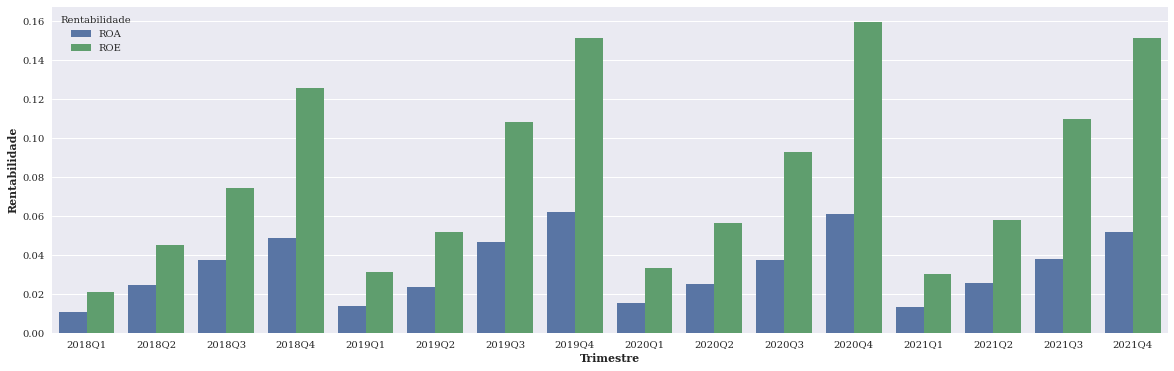

2) Testes de Hipótese
Estatísticas Descritivas - Pré-pandemia


,ROA,ROE
mean,0.033324,0.075916
std,0.018081,0.047335
min,0.010900,0.020988
25%,0.020976,0.041550
50%,0.030866,0.062846
75%,0.046915,0.112480
max,0.061819,0.150992


Estatísticas Descritivas - Pandemia


,ROA,ROE
mean,0.033418,0.086272
std,0.016843,0.050452
min,0.013441,0.029893
25%,0.022497,0.050572
50%,0.031544,0.075231
75%,0.041266,0.120169
max,0.061092,0.159200


,Rentabilidade,Teste,Estatística,Valor p
0,ROA,Teste t,-0.010753,0.991573
1,ROA,Teste H,0.099265,0.752714
2,ROE,Teste t,-0.423406,0.678431
3,ROE,Teste H,0.397059,0.528612


In [101]:
setores = lista_setores()

for nome in list(setores.keys()):
    print('\n', nome.upper())
    setor = setores[nome]

    print('1) Rentabilidade Setorial')
    rentabilidade_setorial = calcula_rentabilidade_setorial(dfcs, setor, nome=nome)
    rentabilidade_setorial = rentabilidade_setorial['2018-01-01':]
    display(rentabilidade_setorial)
    
    plot_rentabilidade(rentabilidade_setorial, nome=nome)
    
    print('2) Testes de Hipótese')
    
    rentabilidade_stats = calcula_rentabilidade_testes(rentabilidade_setorial, nome=nome)
    display(rentabilidade_stats)